## Resultado 1


Gráfico salvo com sucesso como: semantic_space_2d_pca.pdf


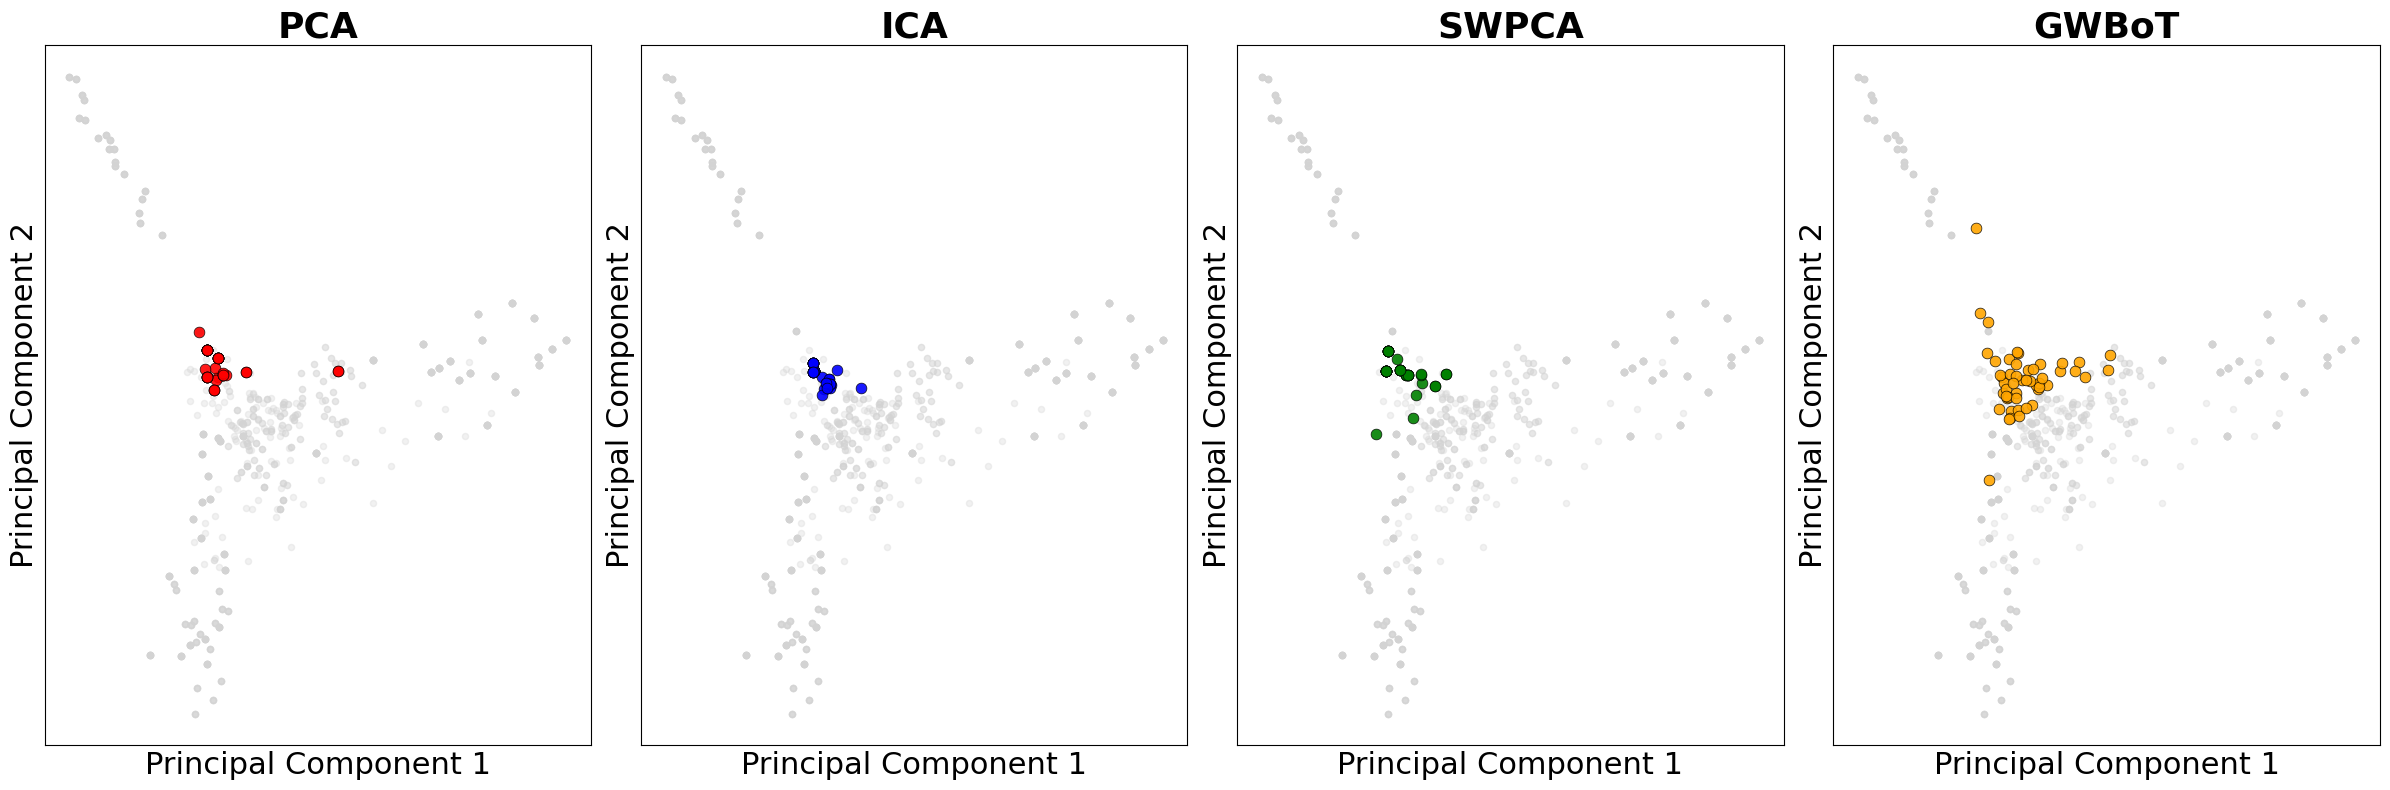

In [27]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# 1. Carregar Dados
try:
    with open('final_results_without_metrics.json', 'r') as f:
        data = json.load(f)
except FileNotFoundError:
    print("Erro: Arquivo 'final_results_without_metrics.json' não encontrado.")
    data = {}

if data:
    # 2. Preparar Dados
    texts = []
    labels = []
    
    methods = ['pca', 'ica', 'score_weighted_pca', 'gradient_weighted']
    method_names = {
        'pca': 'PCA BoT',
        'ica': 'ICA BoT',
        'score_weighted_pca': 'SWPCA BoT',
        'gradient_weighted': 'GWBoT'
    }

    # Coletar textos
    for request_id in range(50):
        str_id = str(request_id)
        # Verificar se o ID existe nos dados
        if str_id not in data.get('pca', {}):
            continue

        # Adicionar Prompts Base (uma vez por request, usando GWBoT como referência)
        base_prompts = data.get('gradient_weighted', {}).get(str_id, {}).get('base_prompts', [])
        for bp in base_prompts:
            texts.append(bp)
            labels.append('Base Prompts')
            
        # Adicionar BoTs de cada método
        for method in methods:
            if str_id in data.get(method, {}):
                bot_list = data[method][str_id].get('BoT', [])
                if bot_list:
                    bot_str = " ".join(bot_list)
                    texts.append(bot_str)
                    labels.append(method_names[method])

    # 3. Vetorização (TF-IDF)
    # Limitamos a 1000 features para focar nas palavras mais importantes
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(texts)

    # 4. Aplicar PCA 2D
    pca_2d = PCA(n_components=2)
    X_pca_2d = pca_2d.fit_transform(X.toarray())
    
    # Criar DataFrame para plotagem
    df_pca = pd.DataFrame(X_pca_2d, columns=['x', 'y'])
    df_pca['label'] = labels

    # 5. Plotagem (4 Painéis)
    fig, axes = plt.subplots(1, 4, figsize=(24, 8))
    
    # Definir limites globais para que todos os gráficos tenham a mesma escala
    x_min, x_max = df_pca['x'].min(), df_pca['x'].max()
    y_min, y_max = df_pca['y'].min(), df_pca['y'].max()
    margin_x = (x_max - x_min) * 0.05
    margin_y = (y_max - y_min) * 0.05
    
    plot_configs = [
        ('PCA BoT', 'red', 'PCA'),
        ('ICA BoT', 'blue', 'ICA'),
        ('SWPCA BoT', 'green', 'SWPCA'),
        ('GWBoT', 'orange', 'GWBoT')
    ]
    
    for i, (method_label, color, title) in enumerate(plot_configs):
        ax = axes[i]
        
        # Plotar Fundo (Base Prompts) - Cinza claro
        base_data = df_pca[df_pca['label'] == 'Base Prompts']
        ax.scatter(
            base_data['x'], base_data['y'],
            c='lightgray', alpha=0.3, s=20, label='Base Prompts', rasterized=True
        )
        
        # Plotar Pontos do Método - Coloridos
        method_data = df_pca[df_pca['label'] == method_label]
        ax.scatter(
            method_data['x'], method_data['y'],
            c=color, alpha=0.9, s=60, label=title,
            edgecolors='k', linewidth=0.5
        )
        
        # Configurações do Gráfico
        ax.set_title(title, fontsize=26, fontweight='bold')
        ax.set_xlabel('Principal Component 1', fontsize=22)
        ax.set_ylabel('Principal Component 2', fontsize=22)
        
        # Aplicar escala uniforme
        ax.set_xlim(x_min - margin_x, x_max + margin_x)
        ax.set_ylim(y_min - margin_y, y_max + margin_y)
        
        # Remover ticks para visual mais limpo
        ax.set_xticks([])
        ax.set_yticks([])

    plt.tight_layout()
    output_filename = "semantic_space_2d_pca.pdf"
    plt.savefig(output_filename, dpi=300, bbox_inches='tight')
    print(f"Gráfico salvo com sucesso como: {output_filename}")

else:
    print("Não foi possível gerar o gráfico devido à falta de dados.")

Gráfico salvo: resultado1.pdf


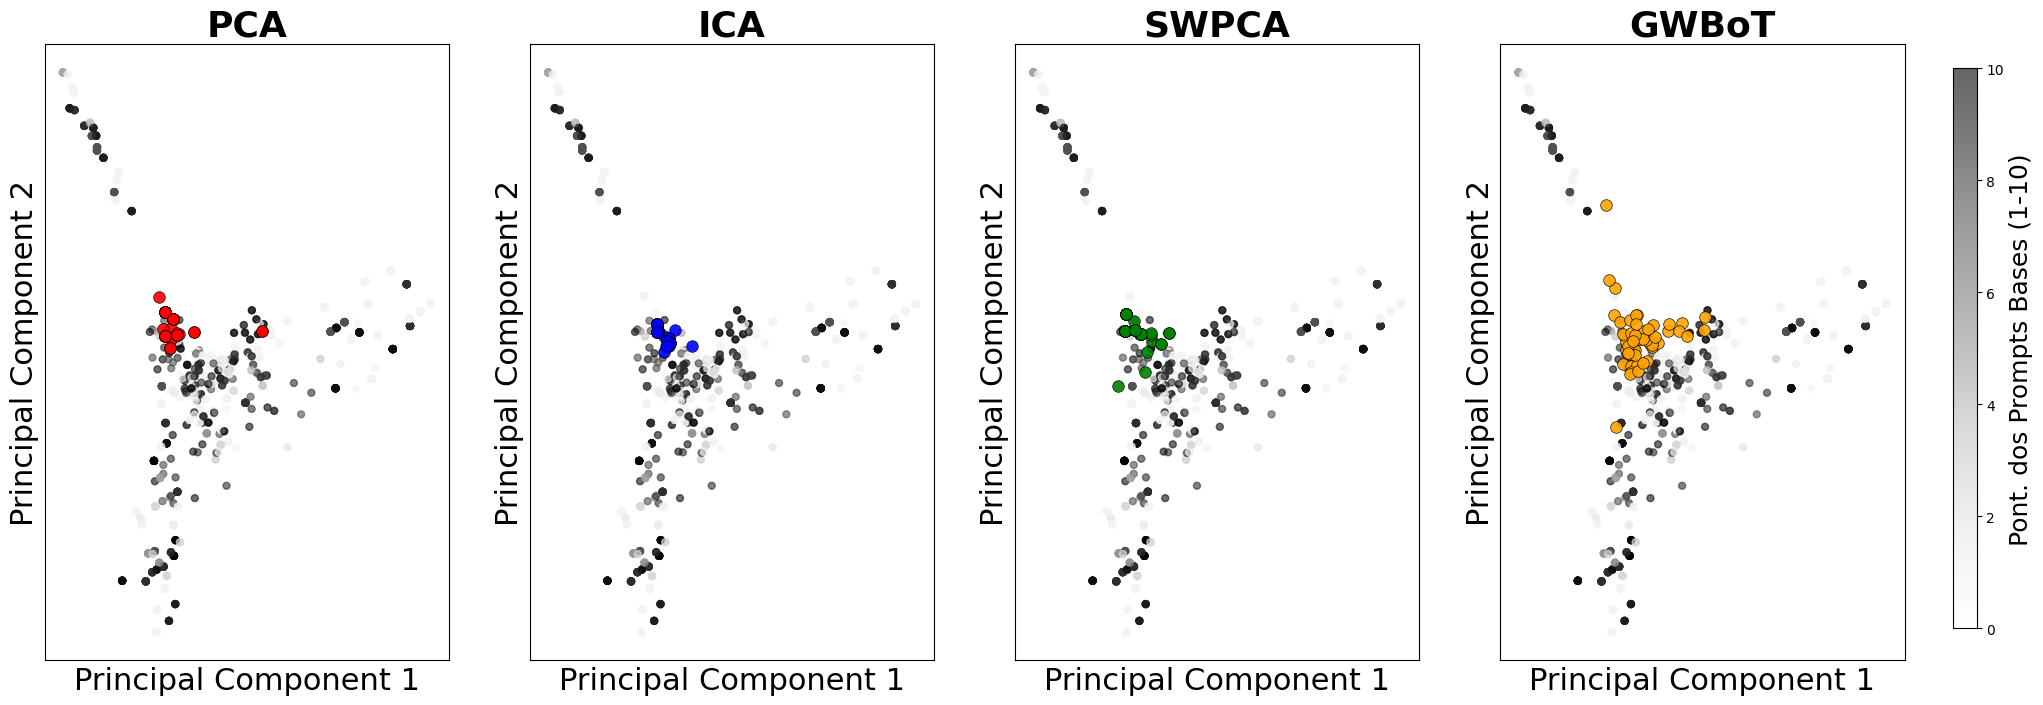

In [39]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# 1. Load Data
try:
    with open('final_results_without_metrics.json', 'r') as f:
        data = json.load(f)
except FileNotFoundError:
    print("Erro: Arquivo 'final_results_without_metrics.json' não encontrado.")
    data = {}

if data:
    texts = []
    labels = []
    scores = []  
    
    methods = ['pca', 'ica', 'score_weighted_pca', 'gradient_weighted']
    method_names = {
        'pca': 'PCA BoT',
        'ica': 'ICA BoT',
        'score_weighted_pca': 'SWPCA BoT',
        'gradient_weighted': 'GWBoT'
    }

    
    for request_id in range(50):
        str_id = str(request_id)
        if str_id not in data.get('pca', {}):
            continue

        gw_data = data.get('gradient_weighted', {}).get(str_id, {})
        base_prompts = gw_data.get('base_prompts', [])
        base_scores_list = gw_data.get('base_scores', [])
        
        if len(base_scores_list) != len(base_prompts):
            # Fallback: assume mean or 1 if missing. 
            # But let's try to use what matches.
            pass

        for i, bp in enumerate(base_prompts):
            texts.append(bp)
            labels.append('Base Prompts')
            
            s = base_scores_list[i] if i < len(base_scores_list) else 1
            scores.append(s)
            
        
        for method in methods:
            if str_id in data.get(method, {}):
                bot_list = data[method][str_id].get('BoT', [])
                if bot_list:
                    bot_str = " ".join(bot_list)
                    texts.append(bot_str)
                    labels.append(method_names[method])
                    scores.append(0) # Placeholder for methods (not used for coloring base prompts)

    
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(texts)

    
    pca_2d = PCA(n_components=2)
    X_pca_2d = pca_2d.fit_transform(X.toarray())
    
    
    df_pca = pd.DataFrame(X_pca_2d, columns=['x', 'y'])
    df_pca['label'] = labels
    df_pca['score'] = scores

    
    fig, axes = plt.subplots(1, 4, figsize=(24, 8))
    
    
    x_min, x_max = df_pca['x'].min(), df_pca['x'].max()
    y_min, y_max = df_pca['y'].min(), df_pca['y'].max()
    margin_x = (x_max - x_min) * 0.05
    margin_y = (y_max - y_min) * 0.05
    
    plot_configs = [
        ('PCA BoT', 'red', 'PCA'),
        ('ICA BoT', 'blue', 'ICA'),
        ('SWPCA BoT', 'green', 'SWPCA'),
        ('GWBoT', 'orange', 'GWBoT')
    ]
    
    for i, (method_label, color, title) in enumerate(plot_configs):
        ax = axes[i]
        
        
        base_data = df_pca[df_pca['label'] == 'Base Prompts']
        
        
        sc = ax.scatter(
            base_data['x'], base_data['y'],
            c=base_data['score'], 
            cmap='Greys', 
            vmin=0, vmax=10,  
            alpha=0.6,        
            s=25, 
            label='Base Prompts (Score)',
            rasterized=True
        )
        
       
        method_data = df_pca[df_pca['label'] == method_label]
        ax.scatter(
            method_data['x'], method_data['y'],
            c=color, alpha=0.9, s=70, label=title,
            edgecolors='k', linewidth=0.5
        )
        
      
        ax.set_title(title, fontsize=26, fontweight='bold')
        ax.set_xlabel('Principal Component 1', fontsize=22)
        ax.set_ylabel('Principal Component 2', fontsize=22)
        
        ax.set_xlim(x_min - margin_x, x_max + margin_x)
        ax.set_ylim(y_min - margin_y, y_max + margin_y)
        
        ax.set_xticks([])
        ax.set_yticks([])

    cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7]) # [left, bottom, width, height]
    cbar = fig.colorbar(sc, cax=cbar_ax)
    cbar.set_label('Pont. dos Prompts Bases (1-10)', fontsize=18)

    plt.subplots_adjust(right=0.9)

    output_filename = "resultado1.pdf"
    plt.savefig(output_filename, dpi=300, bbox_inches='tight')
    print(f"Gráfico salvo: {output_filename}")

else:
    print("Sem dados.")

Gráfico salvo: resultado1.pdf


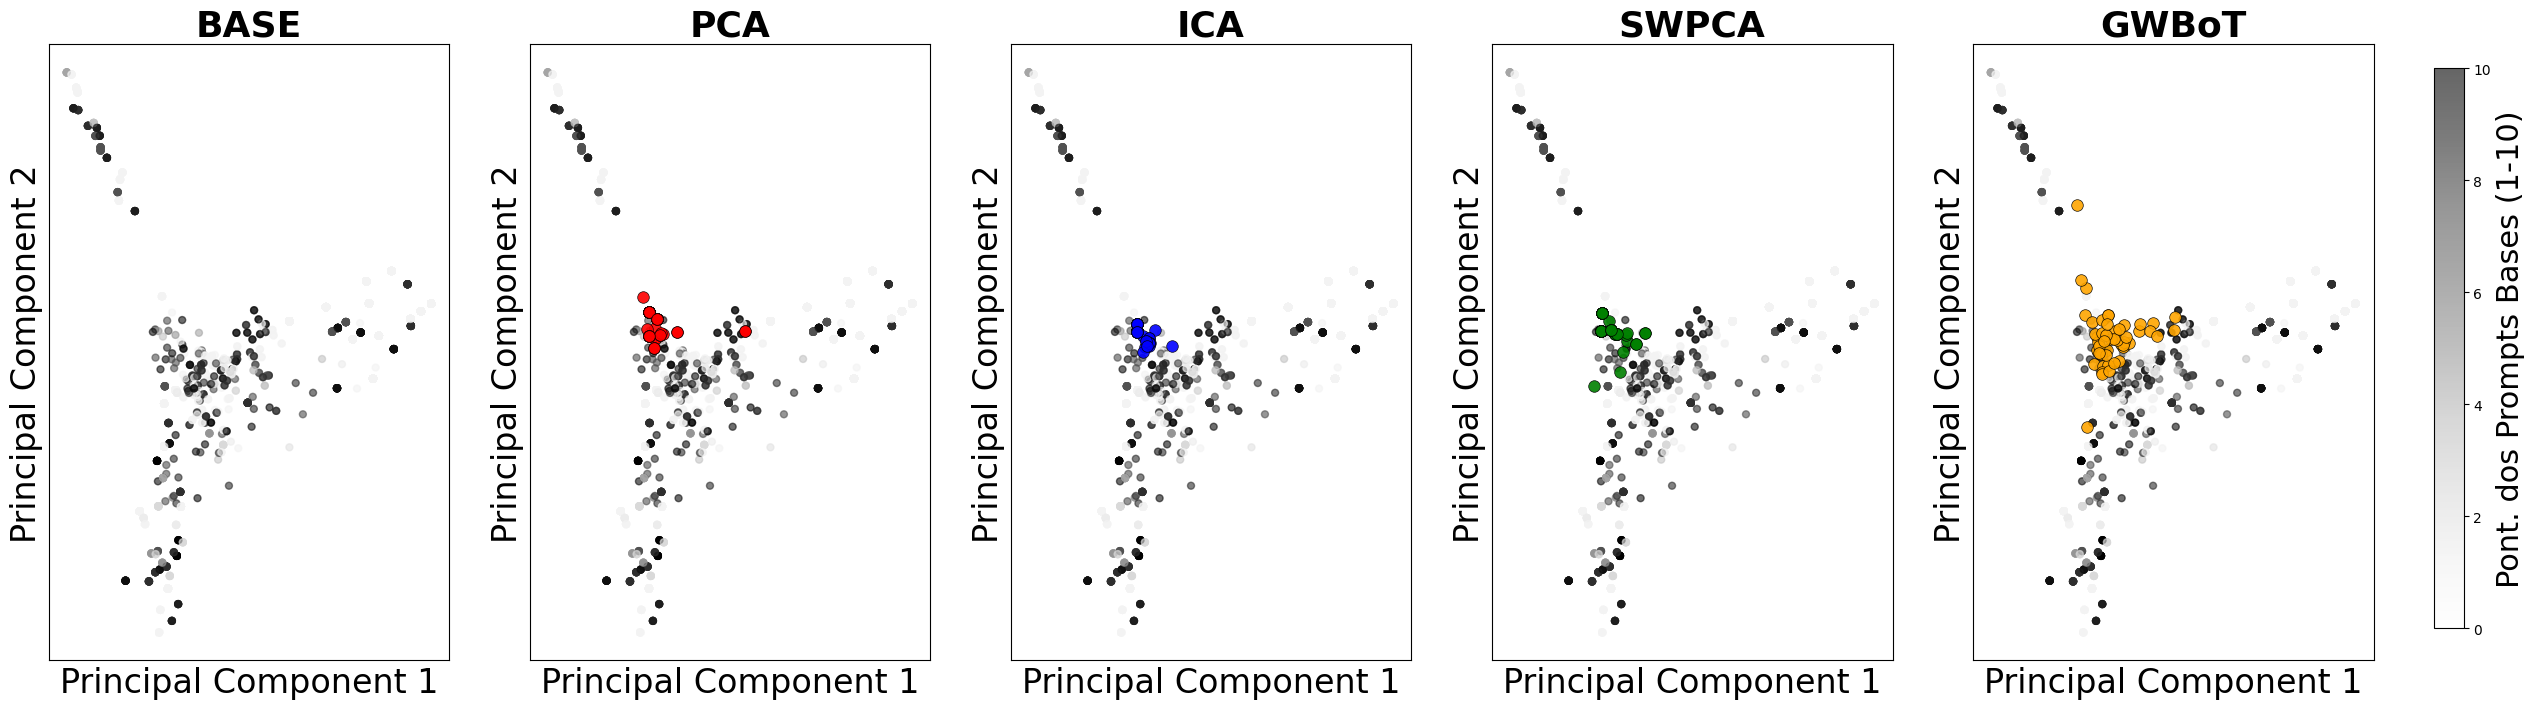

In [45]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# 1. Load Data
try:
    with open('final_results_without_metrics.json', 'r') as f:
        data = json.load(f)
except FileNotFoundError:
    print("Erro: Arquivo 'final_results_without_metrics.json' não encontrado.")
    data = {}

if data:
    texts = []
    labels = []
    scores = []  
    
    methods = ['pca', 'ica', 'score_weighted_pca', 'gradient_weighted']
    method_names = {
        'pca': 'PCA BoT',
        'ica': 'ICA BoT',
        'score_weighted_pca': 'SWPCA BoT',
        'gradient_weighted': 'GWBoT'
    }

    
    for request_id in range(50):
        str_id = str(request_id)
        if str_id not in data.get('pca', {}):
            continue

        gw_data = data.get('gradient_weighted', {}).get(str_id, {})
        base_prompts = gw_data.get('base_prompts', [])
        base_scores_list = gw_data.get('base_scores', [])
        
        if len(base_scores_list) != len(base_prompts):
            # Fallback: assume mean or 1 if missing. 
            # But let's try to use what matches.
            pass

        for i, bp in enumerate(base_prompts):
            texts.append(bp)
            labels.append('Base Prompts')
            
            s = base_scores_list[i] if i < len(base_scores_list) else 1
            scores.append(s)
            
        
        for method in methods:
            if str_id in data.get(method, {}):
                bot_list = data[method][str_id].get('BoT', [])
                if bot_list:
                    bot_str = " ".join(bot_list)
                    texts.append(bot_str)
                    labels.append(method_names[method])
                    scores.append(0) # Placeholder for methods (not used for coloring base prompts)

    
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(texts)

    
    pca_2d = PCA(n_components=2)
    X_pca_2d = pca_2d.fit_transform(X.toarray())
    
    
    df_pca = pd.DataFrame(X_pca_2d, columns=['x', 'y'])
    df_pca['label'] = labels
    df_pca['score'] = scores

    
    # --- ALTERAÇÃO AQUI: Mudamos para 5 subplots e aumentamos a largura ---
    fig, axes = plt.subplots(1, 5, figsize=(30, 8))
    
    
    x_min, x_max = df_pca['x'].min(), df_pca['x'].max()
    y_min, y_max = df_pca['y'].min(), df_pca['y'].max()
    margin_x = (x_max - x_min) * 0.05
    margin_y = (y_max - y_min) * 0.05
    
    # --- ALTERAÇÃO AQUI: Adicionado o primeiro item como (None, None, 'Base Distribution') ---
    plot_configs = [
        (None, None, 'BASE'), # Primeiro gráfico apenas com a base
        ('PCA BoT', 'red', 'PCA'),
        ('ICA BoT', 'blue', 'ICA'),
        ('SWPCA BoT', 'green', 'SWPCA'),
        ('GWBoT', 'orange', 'GWBoT')
    ]
    
    for i, (method_label, color, title) in enumerate(plot_configs):
        ax = axes[i]
        
        # 1. Plotar Base Prompts (Sempre acontece, em todos os gráficos)
        base_data = df_pca[df_pca['label'] == 'Base Prompts']
        
        sc = ax.scatter(
            base_data['x'], base_data['y'],
            c=base_data['score'], 
            cmap='Greys', 
            vmin=0, vmax=10,  
            alpha=0.6,        
            s=25, 
            label='Base Prompts (Score)',
            rasterized=True
        )
        
        # --- ALTERAÇÃO AQUI: Plotar o método apenas se method_label não for None ---
        if method_label is not None:
            method_data = df_pca[df_pca['label'] == method_label]
            ax.scatter(
                method_data['x'], method_data['y'],
                c=color, alpha=0.9, s=70, label=title,
                edgecolors='k', linewidth=0.5
            )
        
      
        ax.set_title(title, fontsize=26, fontweight='bold')
        ax.set_xlabel('Principal Component 1', fontsize=24)
        ax.set_ylabel('Principal Component 2', fontsize=24)
        
        ax.set_xlim(x_min - margin_x, x_max + margin_x)
        ax.set_ylim(y_min - margin_y, y_max + margin_y)
        
        ax.set_xticks([])
        ax.set_yticks([])

    cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7]) # [left, bottom, width, height]
    cbar = fig.colorbar(sc, cax=cbar_ax)
    cbar.set_label('Pont. dos Prompts Bases (1-10)', fontsize=22)

    plt.subplots_adjust(right=0.9)

    output_filename = "resultado1.pdf"
    plt.savefig(output_filename, dpi=300, bbox_inches='tight')
    print(f"Gráfico salvo: {output_filename}")

else:
    print("Sem dados.")